In [24]:
import glob
from hydro import objective_fxns as obfx

In [2]:
# load the parameters
gw1 = np.loadtxt('./opt20_gw1.txt')
gw2 = np.loadtxt('./opt20_gw2.txt')
m = np.loadtxt('./opt20_m.txt')
ksat = np.loadtxt('./opt20_ksat.txt')
crd = np.loadtxt('./opt20_crd.txt')
trd = np.loadtxt('./opt20_trd.txt')
po = np.loadtxt('./opt20_po.txt')
pa = np.loadtxt('./opt20_pa.txt')
idx = np.arange(1,len(gw1)+1) # index variable

In [3]:
files = glob.glob('/RHESSys/Como/out/opt20/*_basin.daily')

In [9]:
tmp = pd.DataFrame({'file':files})

In [17]:
def get_idx(fl): return int(fl.split('/')[-1].split('_')[0])

In [18]:
tmp['idx'] = tmp.file.map(get_idx)

In [20]:
dat = pd.DataFrame({'gw1':gw1,'gw2':gw2,'m':m,'ksat':ksat,'crd':crd,'trd':trd,'po':po,'pa':pa,'idx':idx})

In [22]:
dat = pd.merge(dat,tmp,on='idx')

In [35]:
strt = '2004-10-01'
nd = '2007-09-30'

In [36]:
obs = pd.read_pickle('/RHESSys/Como/obs/como_q_obs.pcl')['2004-10-01':'2007-09-30']

In [40]:
obs = obs.discharge.as_matrix()

In [32]:
def read_date(df):
    return '%s-%s-%s'%(int(df.year),int(df.month),int(df.day))

In [43]:
def compute_ns(fl):
    out = pd.read_table(fl,sep=' ')
    out['datetime'] = out.apply(read_date,axis=1)
    out.index = pd.DatetimeIndex(out.datetime)
    out = out[strt:nd]
    sim = out.streamflow.as_matrix()
    return obfx.nashsut(obs,sim)

In [45]:
dat['ns'] = dat.file.map(compute_ns)

In [49]:
dat.sort_values('ns',inplace=True,ascending=False)

In [51]:
def loadfl(fl):
    out = pd.read_table(fl,sep=' ')
    out['datetime'] = out.apply(read_date,axis=1)
    out.index = pd.DatetimeIndex(out.datetime)
    
    return out

In [53]:
sim = loadfl(dat.file[0])[strt:nd]

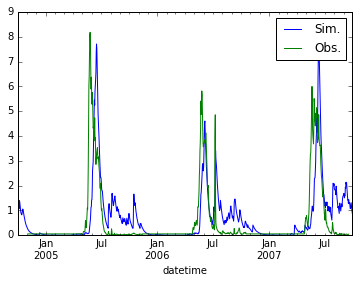

In [61]:
sim.streamflow.plot(label='Sim.')
plt.plot(sim.datetime,obs,label = 'Obs.')
plt.legend()

In [57]:
dat.head()

,crd,gw1,gw2,idx,ksat,m,pa,po,trd,file,ns
0,7.693360,0.338835,0.925561,1,550.830059,9.260107,795.805483,9.352211,2.835409,/RHESSys/Como/out/opt20/1_basin.daily,0.270630
1,3.675079,0.260339,0.929629,2,602.287043,11.880746,64.458516,9.662149,1.718231,/RHESSys/Como/out/opt20/2_basin.daily,0.098313
2,7.907322,0.569225,0.001934,3,297.092856,29.349125,56.957810,165.836227,1.032384,/RHESSys/Como/out/opt20/3_basin.daily,0.031670
3,1.969945,0.534597,0.002350,4,675.116448,18.484190,671.110885,83.844865,1.772318,/RHESSys/Como/out/opt20/4_basin.daily,0.013543
4,4.019799,0.728435,0.003103,5,336.491370,14.596382,436.501422,446.017427,2.094443,/RHESSys/Como/out/opt20/5_basin.daily,-0.008110
